# Data Understanding
**Sumber Data** :
Dataset Iris adalah dataset yang sangat terkenal dalam dunia machine learning dan statistik. Dataset ini diperkenalkan oleh ahli statistik dan biologi Inggris, Ronald Fisher, pada tahun 1936 dalam makalahnya "The use of multiple measurements in taxonomic problems".

**Deskripsi Data** :
Berdasarkan file iris-full.csv yang Anda berikan dan pengetahuan umum mengenai dataset ini, kita dapat memahami data sebagai berikut:

**Struktur** : 
Dataset ini terdiri dari 150 baris data, di mana setiap baris merepresentasikan satu bunga Iris. Terdapat 6 kolom dalam dataset ini.

**Atribut/Fitur** :

1. id: Nomor identifikasi unik untuk setiap sampel bunga.
2. Class: Ini adalah target variabel kita, yaitu spesies dari bunga Iris. Ada tiga spesies dalam dataset ini:
    - Iris-setosa
    - Iris-versicolor
    - Iris-virginica

3. Setiap spesies memiliki 50 sampel, sehingga dataset ini seimbang.

4. sepal length: Panjang kelopak bunga dalam sentimeter.

5. sepal width: Lebar kelopak bunga dalam sentimeter.

6. petal length: Panjang mahkota bunga dalam sentimeter.

7. petal width: Lebar mahkota bunga dalam sentimeter.

**Kualitas Data** : Dataset Iris dikenal sebagai dataset yang "bersih", artinya tidak ada data yang hilang (missing values) di dalamnya, sehingga kita tidak perlu melakukan pembersihan data yang rumit. Semua fitur pengukuran (panjang dan lebar) adalah numerik (tipe data float), sedangkan kolom Class adalah kategorikal (tipe data string).

## Eksplorasi Data
1. Load Dataset


In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set(style="whitegrid")

# Muat dataset
df = pd.read_csv('iris-full.csv')

# Tampilkan 5 baris pertama
print("Lima Baris Pertama Data:")
display(df.head())

# Tampilkan informasi umum
print("\nInformasi Umum Dataset:")
df.info()

Lima Baris Pertama Data:


,id,Class,sepal length,sepal width,petal length,petal width
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2
4,5,Iris-setosa,5.0,3.6,1.4,0.2



Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   sepal length  150 non-null    float64
 3   sepal width   150 non-null    float64
 4   petal length  150 non-null    float64
 5   petal width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


2. Get Data ke Power BI
Untuk melakukan Get Data ke Power BI maka harus sudah menginstall Power BI desktop. Setelah Terinstal kemudian buka Power BI desktop, kemudian pilih menu `Home` dan pilih `Transform data`. Setelah itu pilih `Python Script` dan masukkan script sesuai dengan lokasi dataset disimpan. Contoh kasus saya adalah MySQL dan PostgreSQL

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# --- GANTI DENGAN INFORMASI KONEKSI POSTGRESQL ANDA ---
db_user = 'user_anda'
db_password = 'password_anda'
db_host = 'localhost' # atau alamat IP/hostname server
db_port = '5432'
db_name = 'nama_database_anda'

# Membuat URL koneksi untuk PostgreSQL
# Format: postgresql://<user>:<password>@<host>:<port>/<database>
db_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Membuat koneksi engine ke database
try:
    engine = create_engine(db_url)
    print("Koneksi ke PostgreSQL berhasil dibuat.")
except Exception as e:
    print(f"Gagal terhubung ke PostgreSQL. Error: {e}")
    engine = None

# --- TULIS QUERY SQL ANDA DI SINI ---
# Ganti 'nama_tabel_anda' dengan tabel yang ingin Anda ambil
query = "SELECT * FROM [nama_tabel];"

# Mengambil data menggunakan Pandas jika koneksi berhasil
if engine:
    try:
        # Power BI akan mendeteksi DataFrame 'df_postgres' ini
        df_postgres = pd.read_sql(query, engine)
        print("Data berhasil diambil dari PostgreSQL.")
        # print(df_postgres.head()) # Hilangkan komentar ini untuk debugging di luar Power BI
    except Exception as e:
        print(f"Gagal mengambil data. Error: {e}")
        df_postgres = pd.DataFrame() # Buat DataFrame kosong jika gagal
    finally:
        engine.dispose() # Menutup koneksi
else:
    df_postgres = pd.DataFrame() # Buat DataFrame kosong jika koneksi gagal



# --- GANTI DENGAN INFORMASI KONEKSI MYSQL ANDA ---
db_user = 'user_anda'
db_password = 'password_anda'
db_host = 'localhost' # atau alamat IP/hostname server
db_port = '3306'
db_name = 'nama_database_anda'

# Membuat URL koneksi untuk MySQL
# Format: mysql+mysqlconnector://<user>:<password>@<host>:<port>/<database>
db_url = f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Membuat koneksi engine ke database
try:
    engine = create_engine(db_url)
    print("Koneksi ke MySQL berhasil dibuat.")
except Exception as e:
    print(f"Gagal terhubung ke MySQL. Error: {e}")
    engine = None

# --- TULIS QUERY SQL ANDA DI SINI ---
# Ganti 'nama_tabel_anda' dengan tabel yang ingin Anda ambil
query = "SELECT * FROM [nama_tabel];"

# Mengambil data menggunakan Pandas jika koneksi berhasil
if engine:
    try:
        # Power BI akan mendeteksi DataFrame 'df_mysql' ini
        df_mysql = pd.read_sql(query, engine)
        print("Data berhasil diambil dari MySQL.")
        # print(df_mysql.head()) # Hilangkan komentar ini untuk debugging di luar Power BI
    except Exception as e:
        print(f"Gagal mengambil data. Error: {e}")
        df_mysql = pd.DataFrame() # Buat DataFrame kosong jika gagal
    finally:
        engine.dispose() # Menutup koneksi
else:
    df_mysql = pd.DataFrame() # Buat DataFrame kosong jika koneksi gagal

Koneksi ke PostgreSQL berhasil dibuat.


Gagal mengambil data. Error: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: FATAL:  password authentication failed for user "user_anda"

(Background on this error at: https://sqlalche.me/e/20/e3q8)
Koneksi ke MySQL berhasil dibuat.


Gagal mengambil data. Error: (mysql.connector.errors.DatabaseError) 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)
(Background on this error at: https://sqlalche.me/e/20/4xp6)


Setelah itu, klik OK. Ketika berhasil, centang tabel yang mau diproses ke Power BI kemudian klik `Transform`

2. Analisis Missing Value \
Langkah ini dilakukan untuk melihat apakah ada data yang hilang atau tidak lengkap

In [4]:
# Memeriksa jumlah missing values di setiap kolom
print(df.isnull().sum())

id              0
Class           0
sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64


Kesimpulan: Dataset ini sangat baik karena tidak memiliki nilai yang hilang sama sekali. Ini menyederhanakan tahap pra-pemrosesan data karena kita tidak perlu melakukan teknik imputasi.

3. Analisis Statistik Deskriptif \
Fungsi `describe()` memberikan statistik deskriptif untuk kolom-kolom numerik, seperti rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil.

In [5]:
df.describe()

,id,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


4. Analisis Distribusi Kelas \
Sekarang melihat distribusi dari variabel target kita, yaitu `Class`.

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


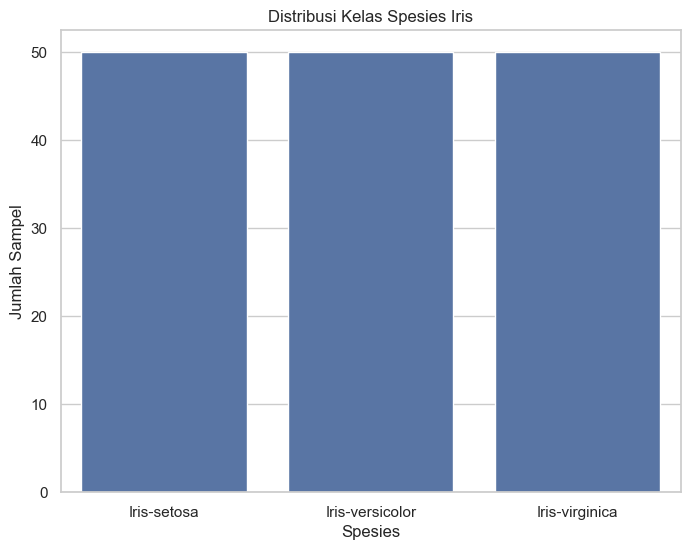

In [6]:
# Hitung jumlah sampel untuk setiap kelas
class_distribution = df['Class'].value_counts()
print(class_distribution)

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.title('Distribusi Kelas Spesies Iris')
plt.xlabel('Spesies')
plt.ylabel('Jumlah Sampel')
plt.show()

5. Analisis Univariat (Distribusi Fitur) \
Sekarang melihat distribusi dari masing-masing fitur numerik menggunakan histogram.

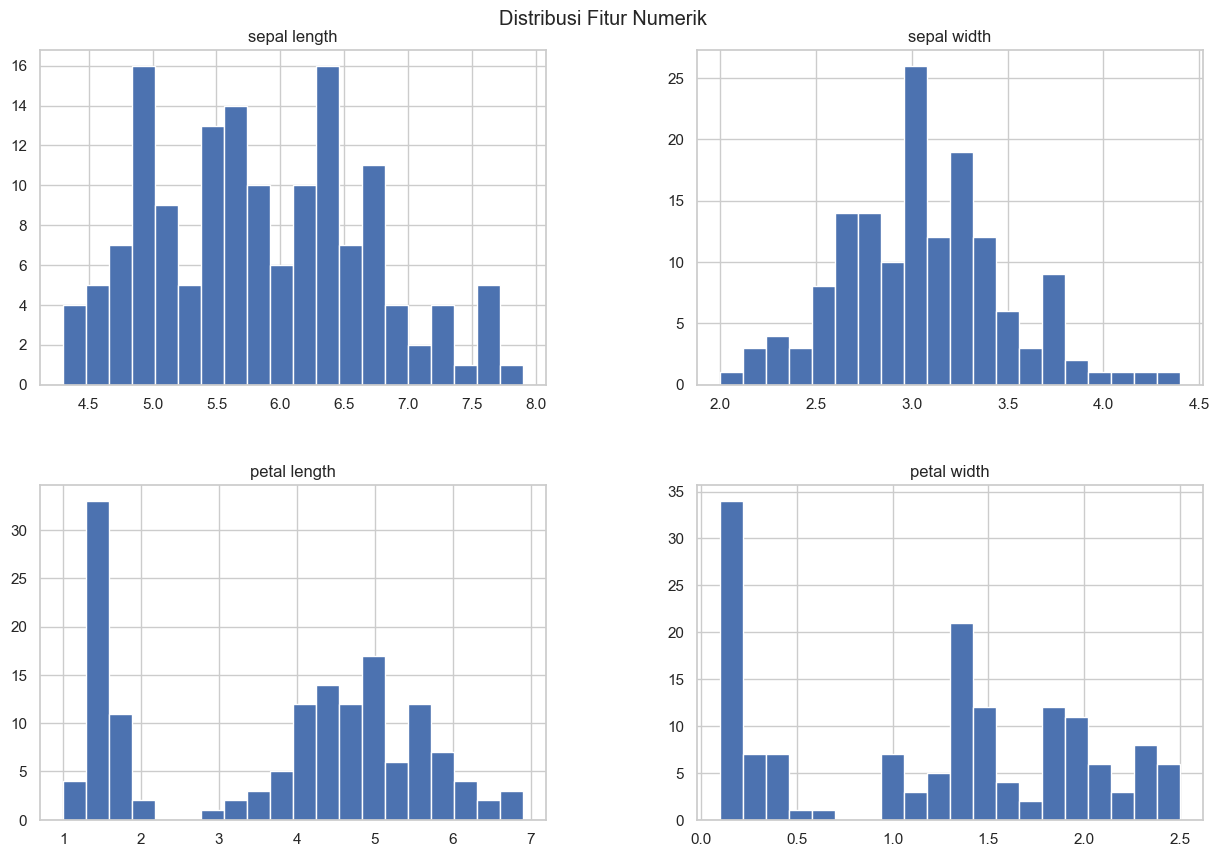

In [7]:
# Pilih kolom numerik (tanpa 'id')
numerical_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Buat histogram untuk setiap fitur numerik
df[numerical_columns].hist(bins=20, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Distribusi Fitur Numerik', y=0.92)
plt.show()

6. Analisis Bivariat (Hubungan Antar Fitur) \
Ini bertujuan untuk mengeksplorasi hubungan antara pasangan fitur dan bagaimana fitur-fitur tersebut bervariasi antar kelas.

Pairplot \
`pairplot` dari Seaborn adalah cara yang sangat efektif untuk memvisualisasikan hubungan antar semua pasangan fitur sekaligus.

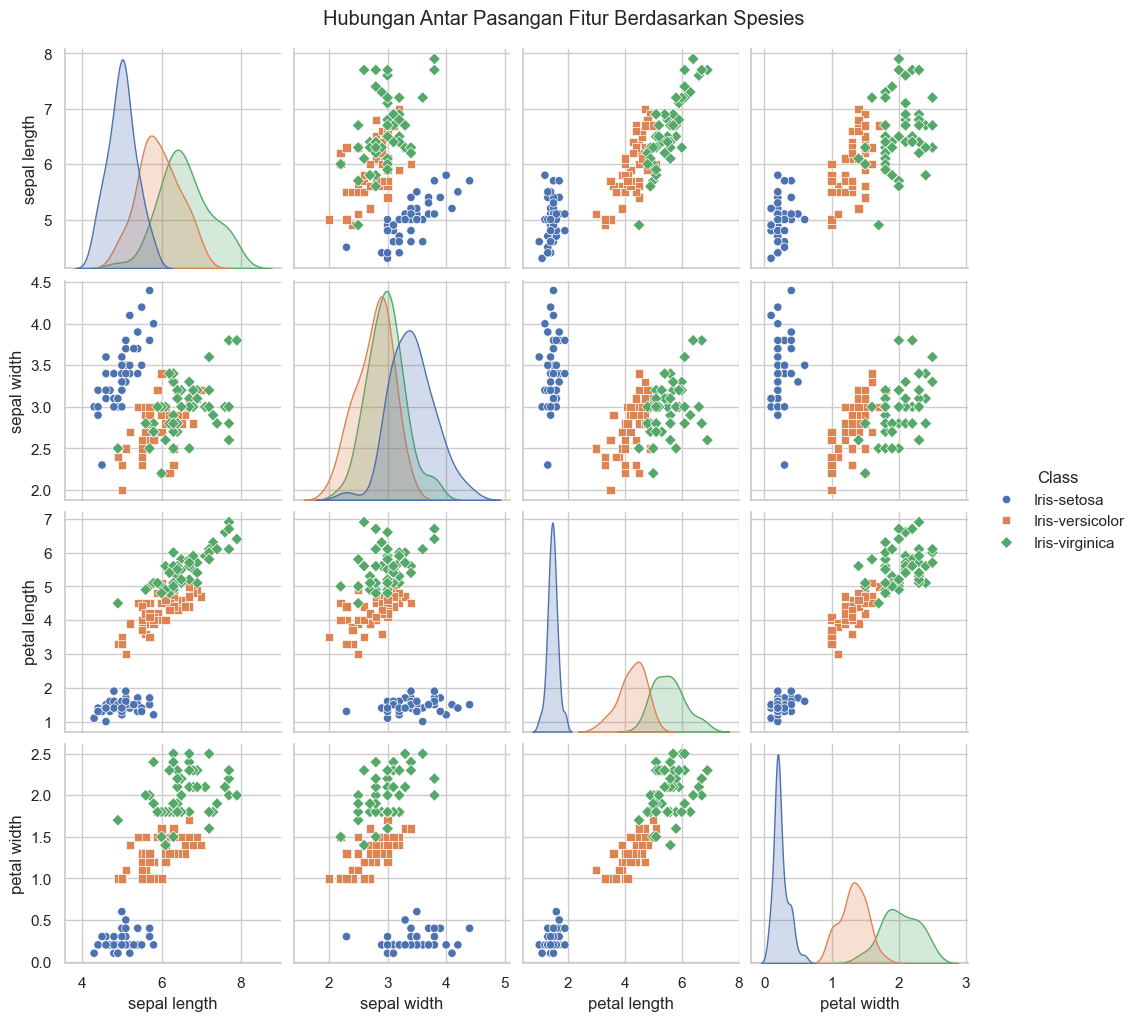

In [8]:
# Membuat pair plot, diwarnai berdasarkan spesies
# Kita akan menghapus kolom 'id' agar tidak ikut divisualisasikan
sns.pairplot(df.drop('id', axis=1), hue='Class', markers=["o", "s", "D"])
plt.suptitle('Hubungan Antar Pasangan Fitur Berdasarkan Spesies', y=1.02)
plt.show()

Observasi:

* Iris-setosa (biru) sangat mudah dipisahkan dari dua spesies lainnya. Kelompok ini memiliki petal length dan petal width yang jauh lebih kecil.
* Iris-versicolor (oranye) dan Iris-virginica (hijau) memiliki beberapa tumpang tindih, terutama pada fitur sepal. Namun, mereka cenderung dapat dipisahkan dengan baik menggunakan kombinasi petal length dan petal width.
* Terdapat korelasi positif yang kuat antara petal length dan petal width.

Boxplot \
Box plot membantu kita melihat perbandingan distribusi setiap fitur di ketiga kelas.

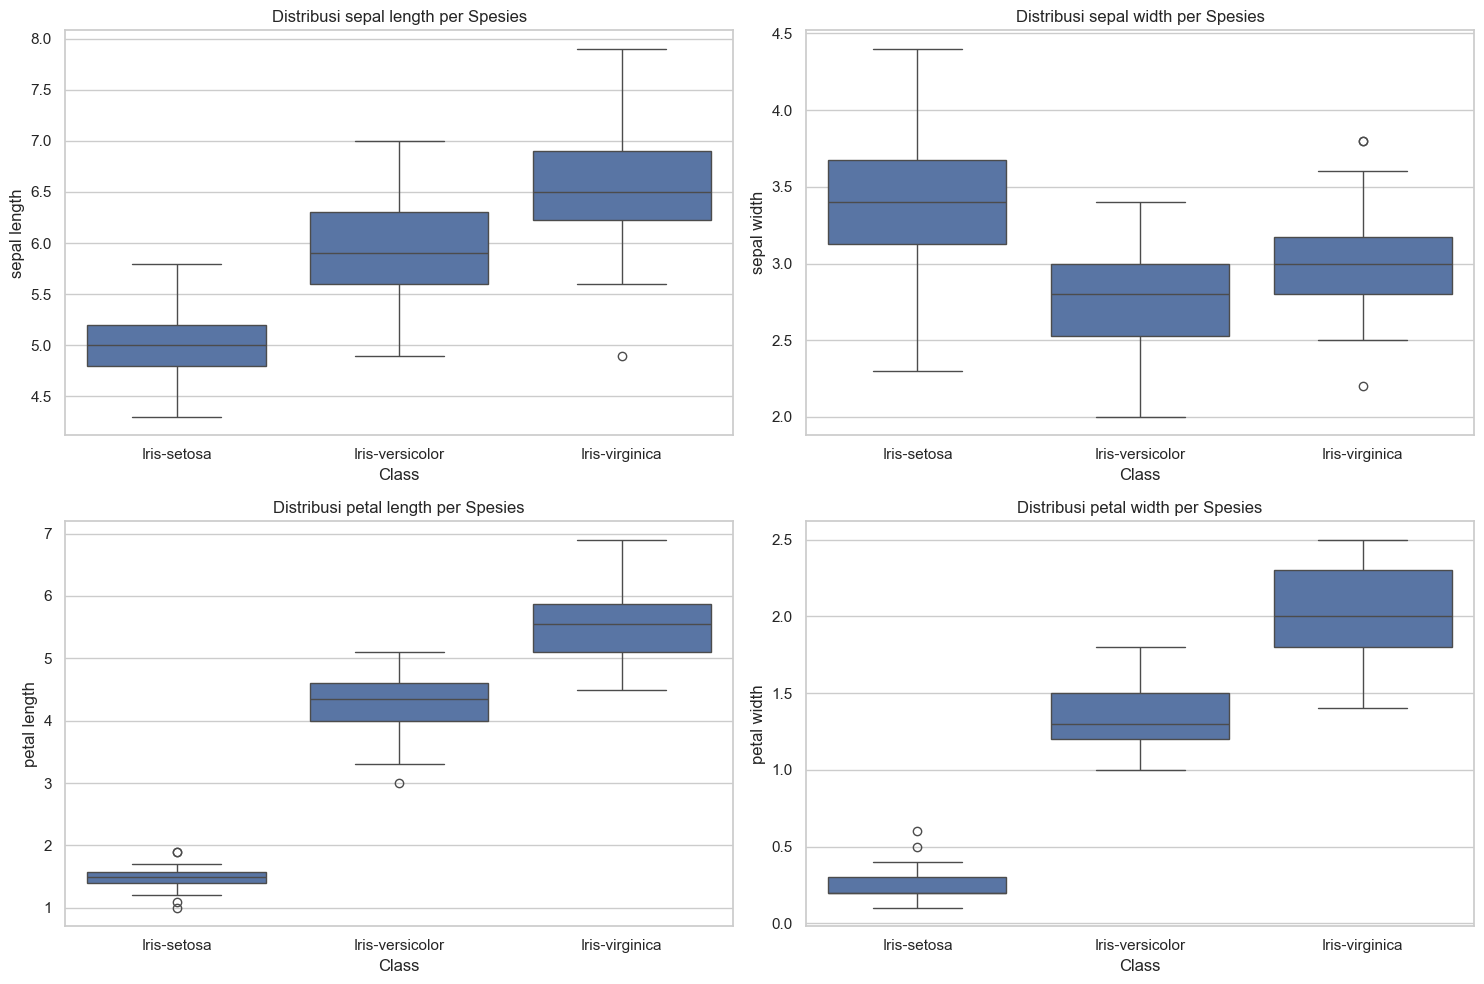

In [9]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Distribusi {col} per Spesies')

plt.tight_layout()
plt.show()

7. Analisis Korelasi
Yaitu melihat korelasi antar fitur fitur menggunakan heatmap

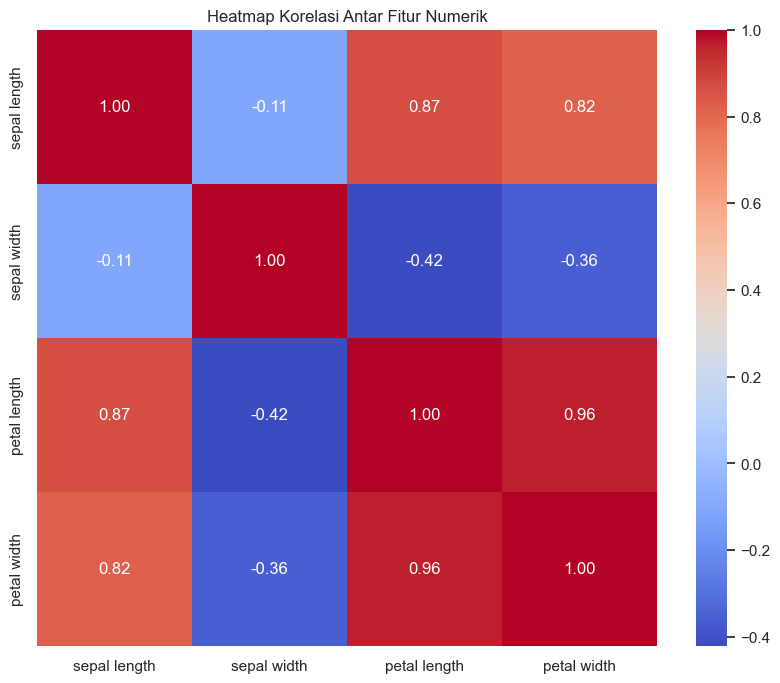

In [10]:
# Hitung matriks korelasi
correlation_matrix = df[numerical_columns].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

Observasi:

* Terdapat korelasi positif yang sangat kuat antara petal length dan petal width (0.96) serta petal length dan sepal length (0.87). Ini berarti ketika satu fitur meningkat, fitur lainnya juga cenderung meningkat.
* Terdapat korelasi negatif yang lemah antara sepal width dan sepal length (-0.11).